In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
def show_pdf(conc_1, conc_2):
    successes = np.arange(0, 41).astype(float)
    probs = tfp.distributions.BetaBinomial(
            40,
            conc_1,
            conc_2,
            validate_args=True,
        ).prob(successes)
    plt.plot(successes, probs, label='a={:.1f}, b={:.1f}'.format(conc_1, conc_2))

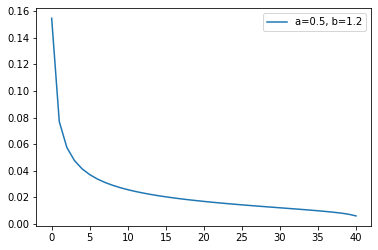

In [3]:
conc_1 = 0.5
conc_2 = 1.2
show_pdf(conc_1, conc_2)
plt.legend()

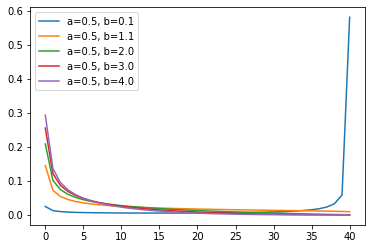

In [4]:
conc_1 = 0.5
for conc_2 in np.linspace(0.1, 4, num=5):
    show_pdf(conc_1, conc_2)
    plt.legend()

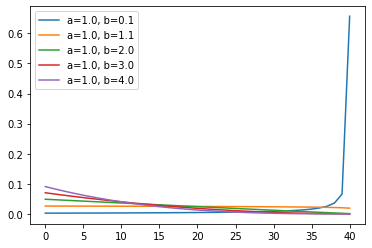

In [5]:
conc_1 = 1.
for conc_2 in np.linspace(0.1, 4, num=5):
    show_pdf(conc_1, conc_2)
    plt.legend()

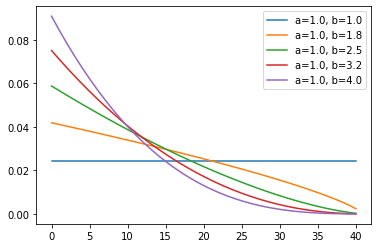

In [6]:
conc_1 = 1.
for conc_2 in np.linspace(1, 4, num=5):
    show_pdf(conc_1, conc_2)
    plt.legend()

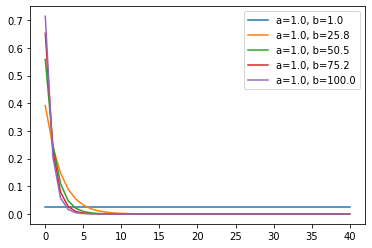

In [7]:
conc_1 = 1.
for conc_2 in np.linspace(1, 100, num=5):
    show_pdf(conc_1, conc_2)
    plt.legend()

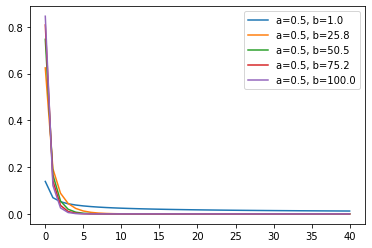

In [8]:
conc_1 = .5
for conc_2 in np.linspace(1, 100, num=5):
    show_pdf(conc_1, conc_2)
    plt.legend()

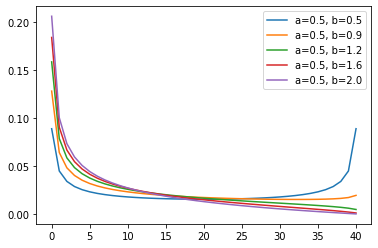

In [9]:
conc_1 = .5
for conc_2 in np.linspace(.5, 2, num=5):
    show_pdf(conc_1, conc_2)
    plt.legend()

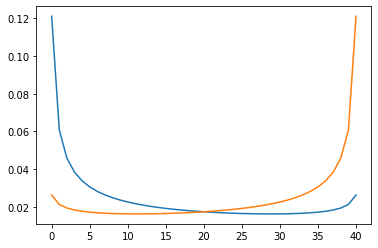

In [10]:
show_pdf(0.5, 0.8)
show_pdf(0.8, 0.5)

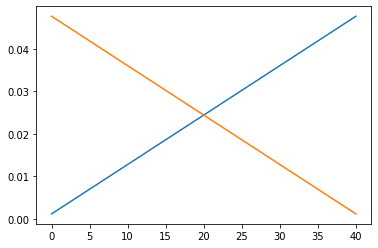

In [11]:
show_pdf(2, 1)
show_pdf(1, 2)

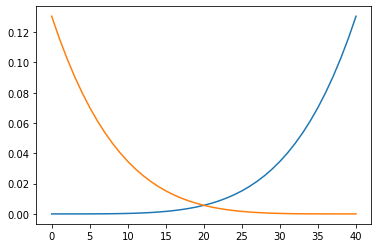

In [12]:
show_pdf(6, 1)
show_pdf(1, 6)

In [13]:
def soften(x):
    return x**2 / (x**2 + 4)

def get_concentration(x):
    return min_conc + soften(x) * conc_scale

# min_conc = 0.5
# conc_scale = 25
min_conc = 0.01
conc_scale = 100
loss = lambda x, y: -tfp.distributions.BetaBinomial(
        tf.reduce_sum(x, axis=1),
        get_concentration(y[:, 0]),
        get_concentration(y[:, 1])
    ).log_prob(x[:, 0])  # success = smooth vote

In [14]:
smooth = np.arange(0, 20).astype(float)
x = np.stack([smooth, 20-smooth], axis=1)

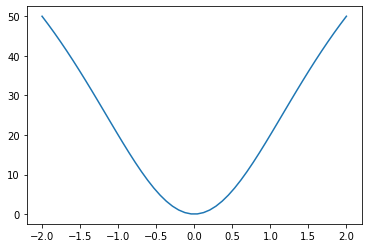

In [15]:


output = np.linspace(-2, 2)
conc = get_concentration(output)
# print(output)
# print(conc)
plt.plot(output, conc)

In [23]:
output = np.array([
    [0.31066447, 0.19134748],
    [0.33758587, 0.20187634],
    [0.2549821,  0.17749271],
    [0.27022487, 0.17654711],
    [0.24741405, 0.17398775],
    [0.26764783, 0.17650402]
])

[[2.36596535 0.91704386]
 [2.78018014 1.01857553]
 [1.60940018 0.79143702]
 [1.80280862 0.78319713]
 [1.51727631 0.76110908]
 [1.76937565 0.78282266]]


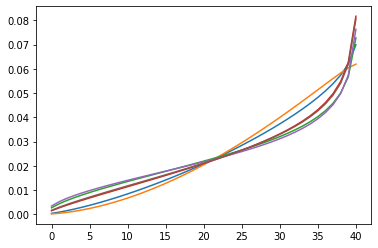

In [24]:
# output = np.stack([np.linspace(0, 3, num=10), np.ones(10) * .0], axis=1)  # output is symmetric
conc = get_concentration(output)
print(conc)
for row in conc:
    show_pdf(row[0], row[1])

In [ ]:
output = np.stack([np.ones(10) * .0, np.linspace(0, 3, num=10)], axis=1)  # output is symmetric
conc = get_concentration(output)
print(conc)
for row in conc:
    show_pdf(row[0], row[1])

In [ ]:
output = np.stack([np.linspace(0, 3, num=10), np.ones(10) * .5], axis=1)
conc = get_concentration(output)
for row in conc:
    show_pdf(row[0], row[1])

In [ ]:
output = np.stack([np.linspace(0, 3, num=10), np.ones(10) * 1.], axis=1)
conc = get_concentration(output)
for row in conc:
    show_pdf(row[0], row[1])

In [ ]:
output = np.stack([np.linspace(0, 3, num=10), np.ones(10) * 2.], axis=1)
conc = get_concentration(output)
for row in conc:
    show_pdf(row[0], row[1])

In [ ]:
output = np.stack([np.linspace(0, 3, num=10), np.ones(10) * 3.], axis=1)
conc = get_concentration(output)
for row in conc:
    show_pdf(row[0], row[1])
print(conc)

In [ ]:
output = np.stack([np.linspace(0, 3, num=10), np.ones(10) * -2.], axis=1)
conc = get_concentration(output)
for row in conc:
    show_pdf(row[0], row[1])

In [ ]:
output = np.stack([np.linspace(-3, 3, num=20), np.linspace(-3, 3, num=20)[::-1]], axis=1)
conc = get_concentration(output)
for row in conc:
    show_pdf(row[0], row[1])